# Tutorial

## Initialize

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yahoo_fin.stock_info as si

# private module to use yahoo_fin
import mystock_info as mi

##
import importlib
importlib.reload(mi)

<module 'mystock_info' from '/home/jovyan/yahoo_fin/mystock_info.py'>

## Overview

This module calls yahoo_fin functions and returns the results by a dataframe. 

**Remarks:** **The downloaded data is cached,** and automatically loaded from the cache if you have new one. The cache is valid for 24 hours in default, but you can change it.

### Download and plot EPS history

- `get_earnings_history()`
- `search_good_eps()`

### Find tickers with high EPS beat ratio

- `search_good_eps()`
- `show_beat_ratio()`

### Download and plot financial data

- `get_financial_data()`
- `plot_financials()`

### In a nut shell

- `get_all_data(tickers, last=20, table=True)`

## Download and plot EPS history

##  plot_eps(tickers, clear_cache=1, last=20, largefig=False, verbose=False)
- This function plots EPS history.
- It calls `get_earnings_history()` (see below) inside the function and returns the obtained dataframe.
- arguments:
    - `tickers`: list of tickers (list) or a ticker name (string)
    - `clear_cache`: number of days cache should be kept

### show_beat_ratio(tickers ,last=40,threshold=95,min_qtrs=20)
- Use this function if you want to analyze EPS beat ratio
- This function calls `get_earnings_history()` and shows the ticker list with EPS beat ratio >= threshold.
- Arguments:
    - `last=20`      number of quarters to be considered 
    - `threshold=80` if you want to show only beatratio > 80%. set False to show all data
    
### get_earnings_history(tickers, clear_cache=1, verbose=False)

- This function download EPS history data and returns the dataframe.
- Usually you don't need to call this function by yourself.
- front end of [yahoo_fin.stock_info.get_earnings_history()](http://theautomatic.net/yahoo_fin-documentation/#get_earnings_history) 
- arguments:
    - `tickers`: list of tickers or string of a ticker
    - `clear_cache`: number of days cache should be kept    

ntick: 5, nrow: 2, ncol: 4


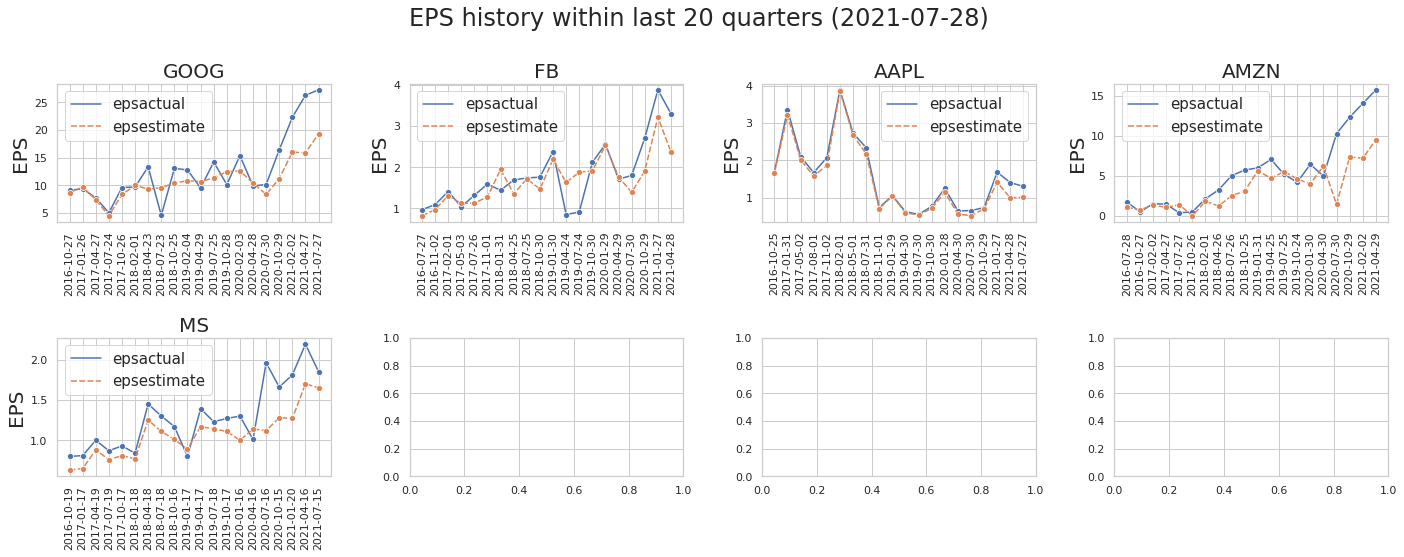

EPS beat ratio (%) within last 20 quarters (2021-07-28)
CPU times: user 2.56 s, sys: 138 ms, total: 2.7 s
Wall time: 2.64 s


,,beat ratio,beat,count
ticker,companyshortname,,,
AAPL,Apple Inc.,100.0,20,20
MS,Morgan Stanley,90.0,18,20
AMZN,"Amazon.com, Inc.",75.0,15,20
FB,"Facebook, Inc.",75.0,15,20
GOOG,Alphabet Inc.,70.0,14,20


In [10]:
%%time
gafam=["GOOG","FB","AAPL","AMZN","MS"]

#df_eps=mi.get_earnings_history(gafam)
#display(df_eps.head(3))

#mi.plot_eps(df_eps,last=20,largefig=False)
mi.plot_eps(gafam,last=20,largefig=False)

mi.show_beat_ratio(df_eps,threshold=False)

If you prefer larger graphs, set the argument `largefig=True` in `plot_eps()`.

ntick: 1, nrow: 1, ncol: 1


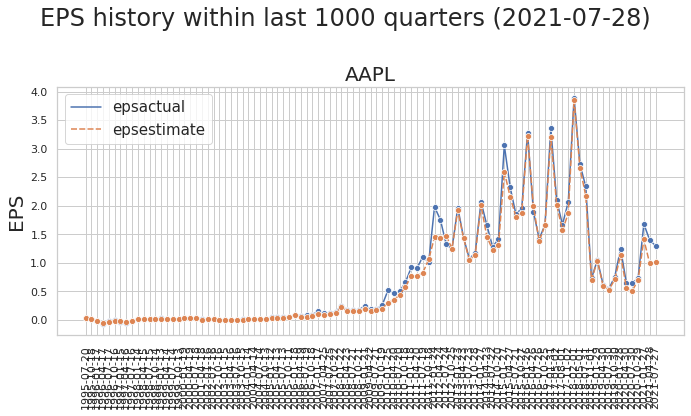

In [11]:
mi.plot_eps("AAPL",largefig=True)

## Find tickers with high EPS beat ratio

You can find good tickers based on the EPS beat ratio using `search_good_eps()` and can make a ranking table using `show_beat_ratio()`

### search_good_eps(tickers, last=20, threshold=80, min_qtrs=4, clear_cache=False, verbose=False)
- get EPS history data for `tickers` and shows tickers with EPS beat ratio >= `threshold` within `last` quarters and with at least `min_qtrs` EPS data.
- return value:
    - combined dataframe of get_earnings_history() for all `tickers`, i.e.,
    ```
    for i in tickers:
        tmp=get_earnings_history(i)
        df=df.append(tmp)
    ``` 
- arguments:
    - `last`: number of quarters to be considred
    - `min_qtrs`: number of quarters required for evaluation
    - `clear_cache`: number of days of preserving cache. Set False if you want to use cache despite the creation date.
    - `threshold`: minimum EPS beat ratio in `last` quarters

In [13]:
df_eps=mi.search_good_eps(tickers=gafam, last=20, threshold=80, min_qtrs=4)

Tickers list of which beat ratio >= 80% within last 20 quarters
(data with more than 4 quarter EPSs)


,,beat ratio,beat,count
ticker,companyshortname,,,
AAPL,Apple Inc.,100.0,20,20
MS,Morgan Stanley,90.0,18,20


## Download and plot financial data

You can get financial data including PSR, PBR, and PER using `get_financial_data()` and can plot the distribution of PSRs using `plot_financials()`.

### plot_financials(df, hist=True, table=True, key="PSR"):
- Plot histogram of PSR(default) distribution and print the PSR ranking.
- This function calls `get_financial_data()` (see below) inside the function and retunrs the obtained dataframe.
- Sorting key can be 
    - "PSR" : Price to Sales Ratio
    - "PBR" : Price Book-value Ratio
    - "PER" : Price Earning Ratio
    - "EPS" : Earning Per Share
    - "Cap" : Market Cap --- Currently sorting doesn't work
- return value:
    - dataframe sorted by the given key
- arguments:
    - `tickers`: list of tickers (list) or a ticker name (string)
   
### get_financial_data(tickers, clear_cache=7, verbose=False)
- download financial data including PSR, PBR, Pand ER using [`yahoo_fin.stock_info.get_quote_table()`](http://theautomatic.net/yahoo_fin-documentation/#get_quote_table) and [`yahoo_fin.stock_info.get_stats_valuation()`](http://theautomatic.net/yahoo_fin-documentation/#get_stats_valuation), and returns the combined dataframe.
- Usually you don't need to call this function explicitly.
- return value:
    - dataframe of the financial data of `tickers`
    

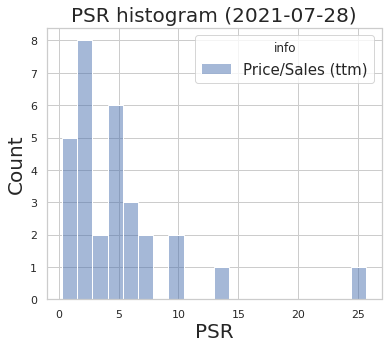

PSR sorted list (<function today at 0x7f1a380d8550>)


info,Market Cap,Previous Close,1y Target Est,Price/Sales (ttm),PE Ratio (TTM),Price/Book (mrq),Earnings Date
Ticker,,,,,,,
V,547.936B,244.14,268.97,25.66,51.47,15.48,"Jul 27, 2021"
MSFT,2.158T,289.05,298.92,13.49,39.05,16.05,"Oct 25, 2021 - Oct 29, 2021"
CRM,229.907B,242.11,278.66,10.29,52.35,5.40,"Aug 23, 2021 - Aug 27, 2021"
MCD,181.29B,238.67,258.34,9.24,35.26,NaN,"Jul 28, 2021"
AAPL,2.449T,148.99,159.34,7.53,32.99,35.40,"Oct 27, 2021 - Nov 01, 2021"
KO,246.006B,56.47,59.80,6.76,30.47,11.06,"Oct 20, 2021 - Oct 25, 2021"
NKE,263.148B,163.68,180.88,5.91,46.73,20.56,"Sep 20, 2021 - Sep 24, 2021"
AMGN,140.616B,244.85,254.96,5.59,20.27,15.08,"Aug 03, 2021"
DIS,318.199B,176.89,206.97,5.45,NaN,3.72,"Aug 12, 2021"


In [16]:
tickers_dow = si.tickers_dow()  # get ticker list of NY Dow

df_psr_sorted = mi.plot_financials(tickers_dow, hist=True, table=True)

# Download and plot revenue data

## def plot_revenue(tickers, clear_cache=7, verbose=False):

- Plot revenue data 
- This function get revenue data using `si.get_earnings()` (see below) and returns it in dict format.


## def get_revenue(tickers, clear_cache=7, verbose=False):

- get revenue data using `si.get_earnings()` and returns it in dict format.
return value:
- dict of which keys are 'quarterly_results', 'yearly_revenue_earnings', and  'quarterly_revenue_earnings' and values are dataframe for `tickers`.

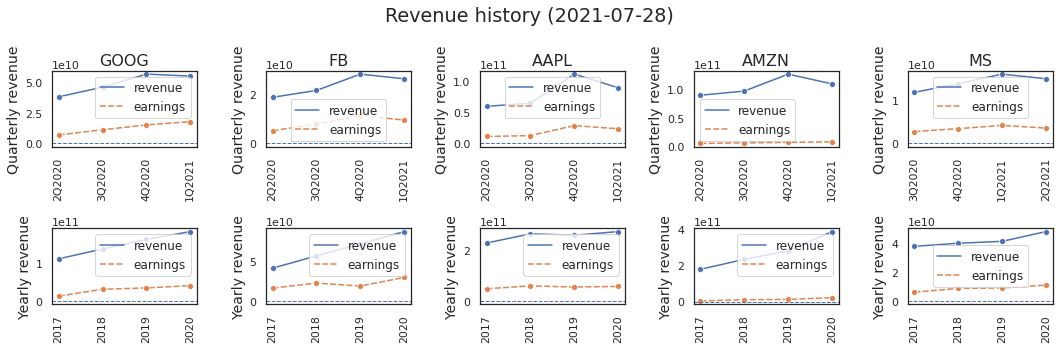

In [19]:
ret=mi.plot_revenue(gafam)

## In a nut shell

**Attention: Under construction from here**

You can get both of EPS history and financial data by `mi.get_all_data()`.

### get_all_data(tickers, last=20, table=True)
- run the following
    1. download EPS history (`get_earnings_history()`))
    2. download financial data (`get_financial_data()`)
    3. shows the EPS beat ratios in 'last' quarters (`show_beat_ratio()`)
- arguments:
    - `tickers`: list of tickers 
    - `last=20`: number of quarters to be considred to get EPS beat ratio
    - `table=False`: show the table of EPS beat ratio or not
- return value: tuple of return values of get_earnings_history() and get_financial_data()

ntick: 5, nrow: 2, ncol: 3


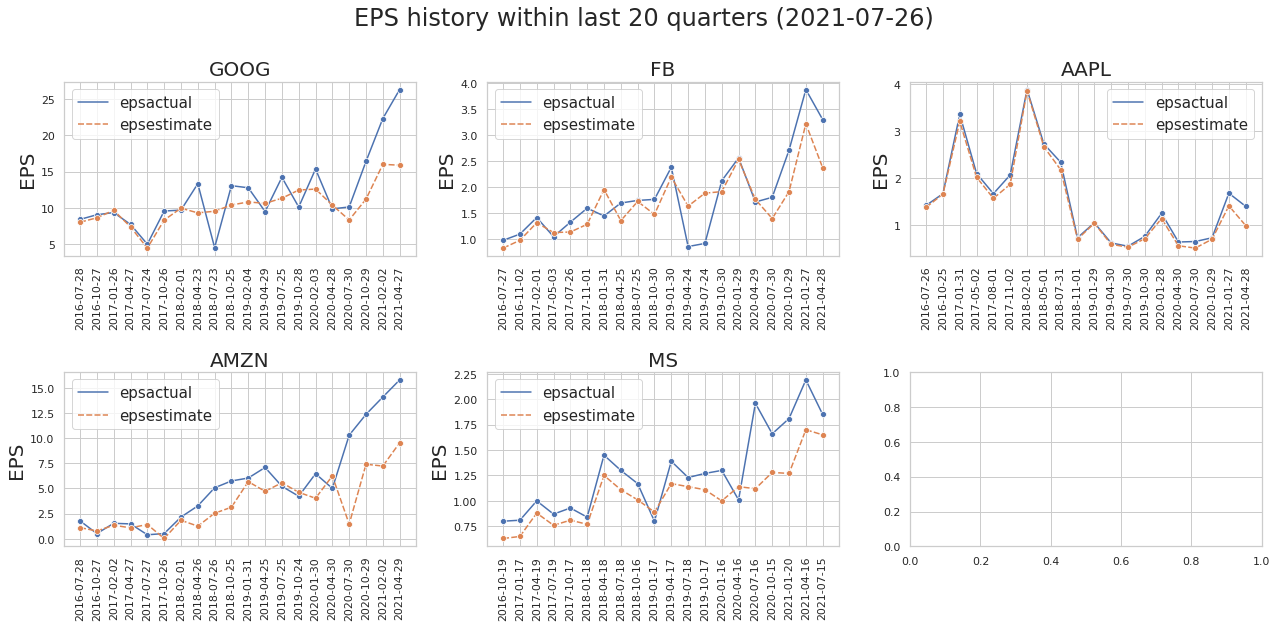

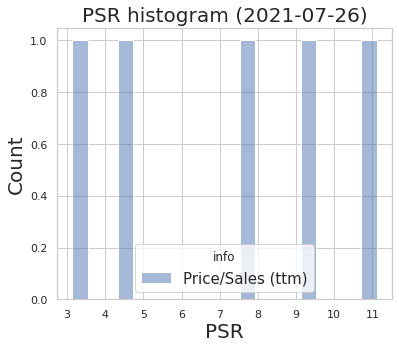

The top 5 PSR stocks (<function today at 0x7f921da8dee0>)


info,Market Cap,Previous Close,1y Target Est,Price/Sales (ttm),PE Ratio (TTM),Price/Book (mrq),Earnings Date
Ticker,,,,,,,
FB,1.049T,351.19,386.47,11.11,31.68,7.86,"Jul 28, 2021"
GOOG,1.814T,2666.57,2625.00,9.22,36.73,8.04,NaN
AAPL,2.45T,145.40,159.34,7.53,33.00,35.41,"Jul 27, 2021"
AMZN,1.844T,3638.03,4241.33,4.40,69.57,17.84,"Jul 29, 2021"
MS,173.405B,95.57,98.53,3.14,12.53,1.79,"Oct 13, 2021 - Oct 18, 2021"


info,Market Cap,Previous Close,1y Target Est,Price/Sales (ttm),PE Ratio (TTM),Price/Book (mrq),Earnings Date
Ticker,,,,,,,
FB,1.049T,351.19,386.47,11.11,31.68,7.86,"Jul 28, 2021"
GOOG,1.814T,2666.57,2625.00,9.22,36.73,8.04,NaN
AAPL,2.45T,145.40,159.34,7.53,33.00,35.41,"Jul 27, 2021"
AMZN,1.844T,3638.03,4241.33,4.40,69.57,17.84,"Jul 29, 2021"
MS,173.405B,95.57,98.53,3.14,12.53,1.79,"Oct 13, 2021 - Oct 18, 2021"


In [9]:
df_all=mi.get_all_data(gafam, table=False)
mi.plot_eps(df_all[0],last=20) # show EPS history within last 20 quarters
mi.plot_financials(df_all[1])